In [1]:
import pandas as pd
t=pd.read_csv("trump.csv",encoding='latin-1')

In [2]:
t.shape

(1512, 17)

In [7]:
def source(s0):
    s0=s0.split('Twitter for ')
    if len(s0)>1:
        s0=s0[1].strip('</a>')
    else:
        s0='web'
    return s0

s0=t.ix[16,'statusSource']
source(s0)

t.drop('ID',1)

t['source']=t.statusSource.map(source)

In [8]:
t1=t.ix[t['source'].isin(['iPhone','Android']),:]

In [9]:
t1.shape
t1.source.value_counts()

Android    762
iPhone     628
Name: source, dtype: int64

In [10]:
t1.columns

Index(['ID', 'text', 'favorited', 'favoriteCount', 'replyToSN', 'created',
       'truncated', 'replyToSID', 'id', 'replyToUID', 'statusSource',
       'screenName', 'retweetCount', 'isRetweet', 'retweeted', 'longitude',
       'latitude', 'source'],
      dtype='object')

In [11]:
def hour(s0):
    s0=int(s0.split()[1].split(":")[0])
    return s0

t1['hour']=t1.created.map(hour)
t1['hour'].value_counts()
t1.columns

#t1.created.value_counts()

/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['ID', 'text', 'favorited', 'favoriteCount', 'replyToSN', 'created',
       'truncated', 'replyToSID', 'id', 'replyToUID', 'statusSource',
       'screenName', 'retweetCount', 'isRetweet', 'retweeted', 'longitude',
       'latitude', 'source', 'hour'],
      dtype='object')

In [12]:
hour=t1.groupby(['hour','source'])['id'].count().reset_index()
hour.columns=['hour', 'source', 'count']
hour['hour']=pd.to_numeric(hour['hour'], errors='ignore')
hour.sort('hour')
hour.shape

/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(46, 3)

In [28]:
#t.ix[16,'statusSource']
#t.ix[16,'statusSource'].split('Twitter for ')

import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x114c13908>,
 <a list of 24 Text xticklabel objects>)

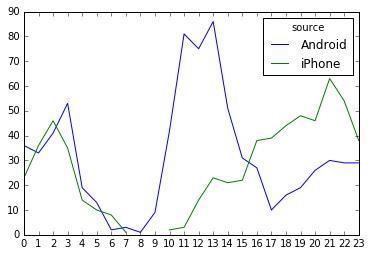

In [29]:
source_hour=hour.pivot('hour', 'source','count')
source_hour.shape
source_hour.plot(source_hour.index.values)
plt.xticks(source_hour.index.values)

In [30]:
def quote(s0):
    q=s0.find('"')
    if q>0:
        q=1
    else:
        q=0
    return q

t1['q']=t1.text.map(quote)


/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
t1['q'].value_counts()

0    1341
1      49
Name: q, dtype: int64

In [32]:
q_t=t1.groupby(['source','q'])['id'].count().reset_index()
q_t.columns=['source','q','count']
q_t=q_t.pivot('source','q','count')
q_t

q,0,1
source,,
Android,721,41
iPhone,620,8


In [33]:
q_t.columns

Int64Index([0, 1], dtype='int64', name='q')

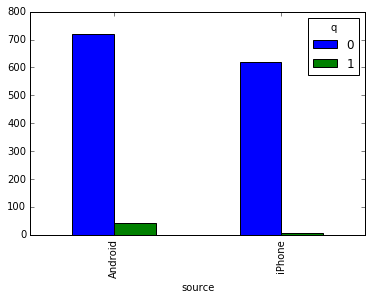

In [34]:
q_t.plot(kind='bar')

In [35]:
t1.text[1]

'Join me in Fayetteville, North Carolina tomorrow evening at 6pm. Tickets now available at: https://t.co/Z80d4MYIg8'

In [36]:
def picture(s0):
    p=s0.find('t.co')+s0.find('#')
    if p>0:
        p=1
    else:
        p=0
    return p

s0=t1.text[1]
picture(s0)

t1['p']=t1.text.map(picture)

/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [37]:
t1.p.value_counts()

0    824
1    566
Name: p, dtype: int64

In [38]:
p_s=t1.groupby(['source','p'])['id'].count().reset_index()

In [39]:
p_s=p_s.pivot('source','p')['id']

In [40]:
p_s

p,0,1
source,,
Android,660,102
iPhone,164,464


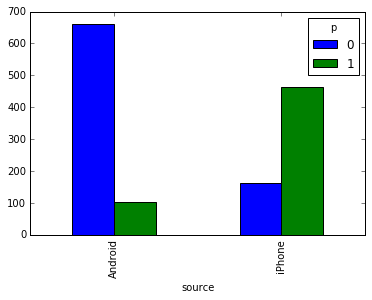

In [41]:
p_s.plot(kind='bar')

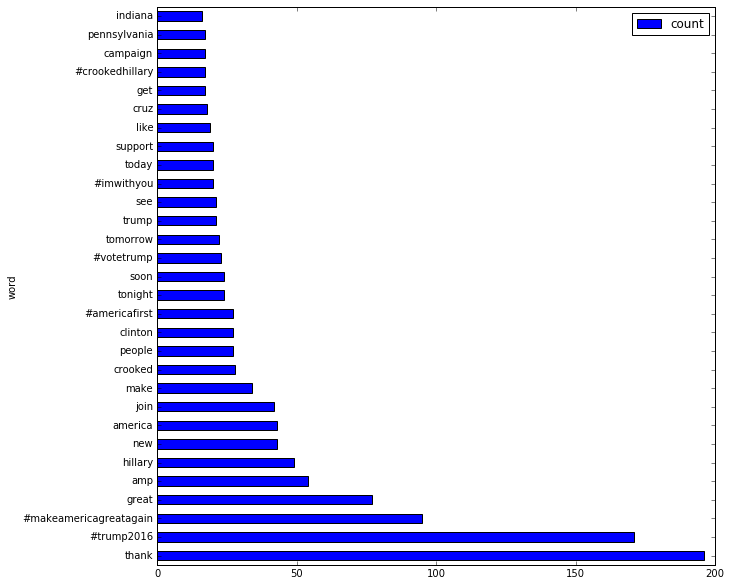

,word,count
word,,
thank,thank,196
#trump2016,#trump2016,171
#makeamericagreatagain,#makeamericagreatagain,95
great,great,77
amp,amp,54
hillary,hillary,49
new,new,43
america,america,43
join,join,42


In [42]:
import re
import nltk
from nltk.corpus import stopwords
import string

ptype='iPhone'

def mostwords(ptype):
    words=' '.join(t1[t1.source==ptype].text).split()
    words2=[]
    for word in words:
        word=word.lower()
        word=word.strip('_:/\|><@_$&%*^!.;,')   
        word=word.replace("\n", "")
        word=word.replace("\t", "")
        if word not in stopwords.words('english') and word not in string.punctuation:
            words2.append(word)
    wfreq=nltk.FreqDist(words2)
    wfreq2=wfreq.most_common(30)
    #keys=[x[0] for x in wfreq2]
    #counts=[x[1] for x in wfreq2]
    word_df=pd.DataFrame(wfreq2)
    word_df.columns=['word','count']
    word_df.index=word_df.word
    return word_df


iphone=mostwords('iPhone')

plt.rcParams['figure.figsize'] = (10, 10)

iphone.plot(kind='barh',color='b')

plt.show()

iphone


,word,count
word,,
hillary,hillary,130
great,great,128
realdonaldtrump,realdonaldtrump,119
crooked,crooked,94
trump,trump,91
people,people,69
clinton,clinton,67
cruz,cruz,56
thank,thank,52


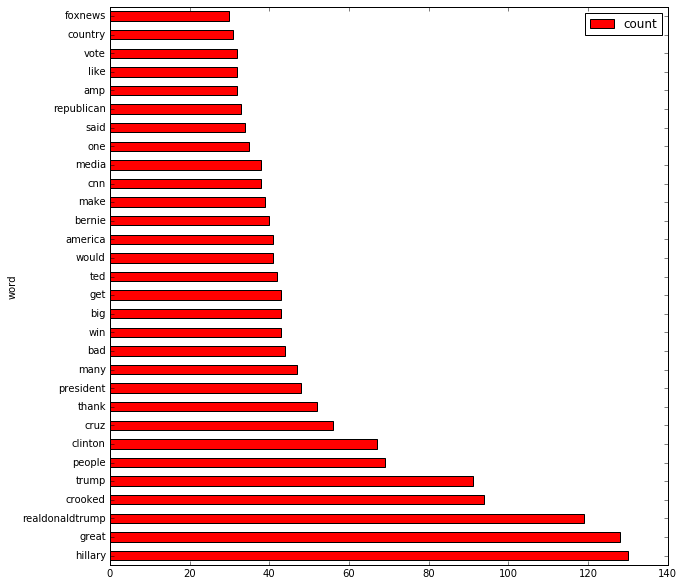

In [43]:

android=mostwords('Android')

plt.rcParams['figure.figsize'] = (10, 10)

android.plot(kind='barh',color='r')

android

In [695]:
import pandas as pd

#nrc = pd.read_csv('NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt', sep='\t',header = None,encoding='latin-1')
#nrc.columns=['word','emo','score']

nrc = pd.read_csv('AFINN-111.txt', sep='\t',header = None,encoding='latin-1')
nrc.columns=['word','score']

nrc.shape
nrc[:20]
#nrc.ix[nrc['word']=='today',:]
#nrc=nrc[nrc.score>0]

#idx = nrc.groupby(['word'])['score'].transform(max) == nrc['score']
#nrc[idx]


,word,score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [696]:
score={}
nrc_score=nrc.groupby('word')['score'].sum()
score=dict(nrc_score)

len(score)

#score.values()

2477

In [697]:
allscore=[]

for text in t1.text:
    tweetscore=0
    for word in text.split():
        word=word.lower()
        word=word.strip('_:/\|><@_$&%*^!.;,')   
        word=word.replace("\n", "")
        word=word.replace("\t", "")
        if word not in stopwords.words('english') and word not in string.punctuation:
            if word in score.keys():
                tweetscore=tweetscore+score[word]
        if allscore is None:
            allscore=[tweetscore]
        else:
            allscore.append(tweetscore)

In [698]:
t1['score']=pd.DataFrame(allscore)
t1['score']
t1[:5]

/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,ID,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,...,retweetCount,isRetweet,retweeted,longitude,latitude,source,hour,q,p,score
0,1,My economic policy speech will be carried live...,False,9214,NaN,8/8/16 15:20,False,NaN,7.630000e+17,NaN,...,3107,False,False,NaN,NaN,Android,15,0,0,0
1,2,"Join me in Fayetteville, North Carolina tomorr...",False,6981,NaN,8/8/16 13:28,False,NaN,7.630000e+17,NaN,...,2390,False,False,NaN,NaN,iPhone,13,0,1,0
2,3,"#ICYMI: ""Will Media Apologize to Trump?"" https...",False,15724,NaN,8/8/16 0:05,False,NaN,7.620000e+17,NaN,...,6691,False,False,NaN,NaN,iPhone,0,1,1,0
3,4,"Michael Morell, the lightweight former Acting ...",False,19837,NaN,8/7/16 23:09,False,NaN,7.620000e+17,NaN,...,6402,False,False,NaN,NaN,Android,23,0,0,0
4,5,The media is going crazy. They totally distort...,False,34051,NaN,8/7/16 21:31,False,NaN,7.620000e+17,NaN,...,11717,False,False,NaN,NaN,Android,21,1,0,0


/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


([<matplotlib.axis.XTick at 0x1267b4358>,
 <a list of 21 Text xticklabel objects>)

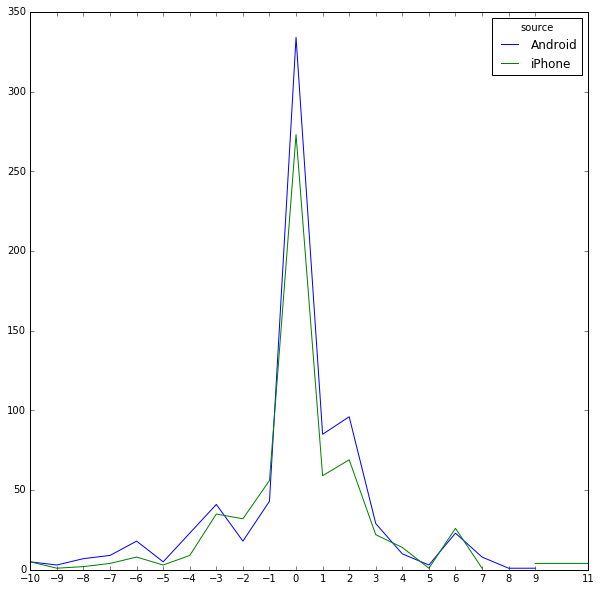

In [699]:
#pscore=t1.groupby(['score','source'])['id'].count().reset_index()
#pscore.columns=('score','source','count')
#pscore

score=t1.groupby(['score','source'])['id'].count().reset_index()
score.columns=['score', 'source', 'count']
score['score']=pd.to_numeric(score['score'], errors='ignore')
score.sort('score')
score.shape

source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values)
plt.xticks(source_score.index.values)

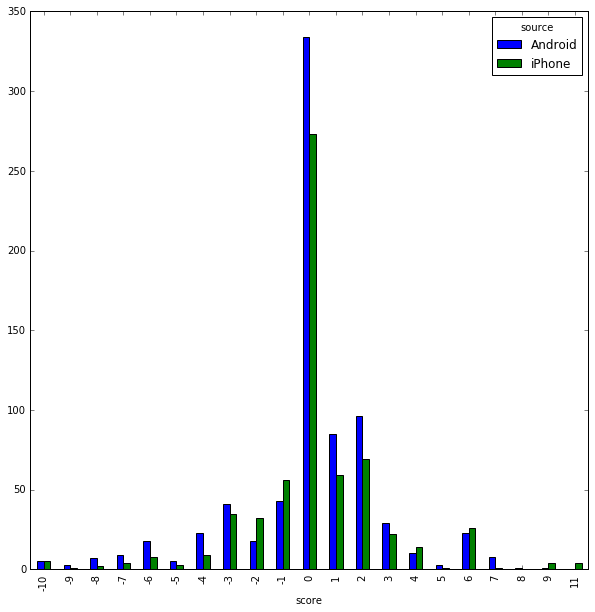

In [700]:
source_score.plot(kind='bar')

In [701]:
import pandas as pd

nrc = pd.read_csv('NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt', sep='\t',header = None,encoding='latin-1')
nrc.columns=['word','emo','score']

#nrc = pd.read_csv('AFINN-111.txt', sep='\t',header = None,encoding='latin-1')
#nrc.columns=['word','score']

nrc.shape
nrc[:20]
#nrc.ix[nrc['word']=='today',:]
#nrc=nrc[nrc.score>0]

#idx = nrc.groupby(['word'])['score'].transform(max) == nrc['score']
#nrc[idx]


,word,emo,score
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


In [708]:
emoset=list(set(nrc['emo']))
print(emoset)
trust=nrc.ix[nrc['emo']==emoset[0],:]
anger=nrc.ix[nrc['emo']==emoset[1],:]
anticipation=nrc.ix[nrc['emo']==emoset[2],:]
joy=nrc.ix[nrc['emo']==emoset[3],:]
fear=nrc.ix[nrc['emo']==emoset[4],:]
positive=nrc.ix[nrc['emo']==emoset[5],:]
negative=nrc.ix[nrc['emo']==emoset[6],:]
disgust=nrc.ix[nrc['emo']==emoset[7],:]
surprise=nrc.ix[nrc['emo']==emoset[8],:]
sadness=nrc.ix[nrc['emo']==emoset[9],:]

['trust', 'anger', 'anticipation', 'joy', 'fear', 'positive', 'negative', 'disgust', 'surprise', 'sadness']


In [712]:
def emo_score(emo):
    score={}
    nrc_score=emo.groupby('word')['score'].sum()
    score=dict(nrc_score)

    len(score)

    allscore=[]

    for text in t1.text:
        tweetscore=0
        for word in text.split():
            word=word.lower()
            word=word.strip('_:/\|><@_$&%*^!.;,')   
            word=word.replace("\n", "")
            word=word.replace("\t", "")
            if word not in stopwords.words('english') and word not in string.punctuation:
                if word in score.keys():
                    tweetscore=tweetscore+score[word]
            if allscore is None:
                allscore=[tweetscore]
            else:
                allscore.append(tweetscore)
    return allscore

In [722]:
def tweet_score(trust):
    trust_score=emo_score(trust)
    t1['score']=pd.DataFrame(trust_score)
    t1['score']
    score=t1.groupby(['score','source'])['id'].count().reset_index()
    score.columns=['score', 'source', 'count']
    score['score']=pd.to_numeric(score['score'], errors='ignore')
    score.sort('score')
    score.shape
    return score

#score=tweet_score(trust)

/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


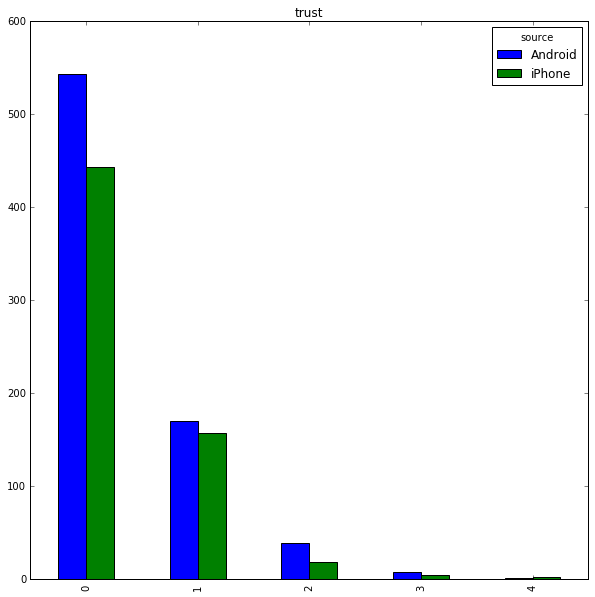

In [740]:
score=tweet_score(trust)
source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values,kind='bar')
plt.xticks(source_score.index.values)
plt.title('trust')

/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


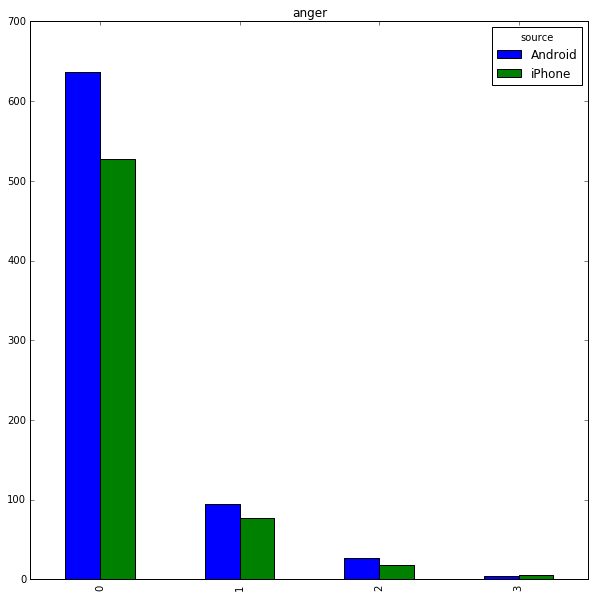

In [743]:
score=tweet_score(anger)
source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values,kind='bar')
plt.xticks(source_score.index.values)
plt.title('anger')

/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


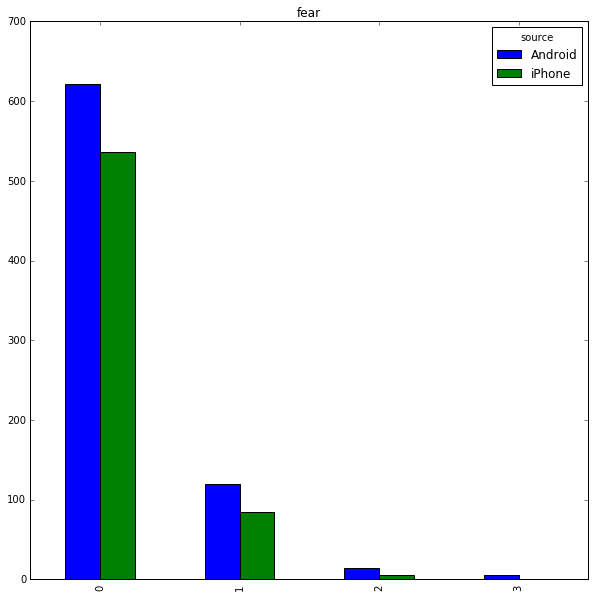

In [744]:
score=tweet_score(fear)
source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values,kind='bar')
plt.xticks(source_score.index.values)
plt.title('fear')

['trust', 'anger', 'anticipation', 'joy', 'fear', 'positive', 'negative', 'disgust', 'surprise', 'sadness']


/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


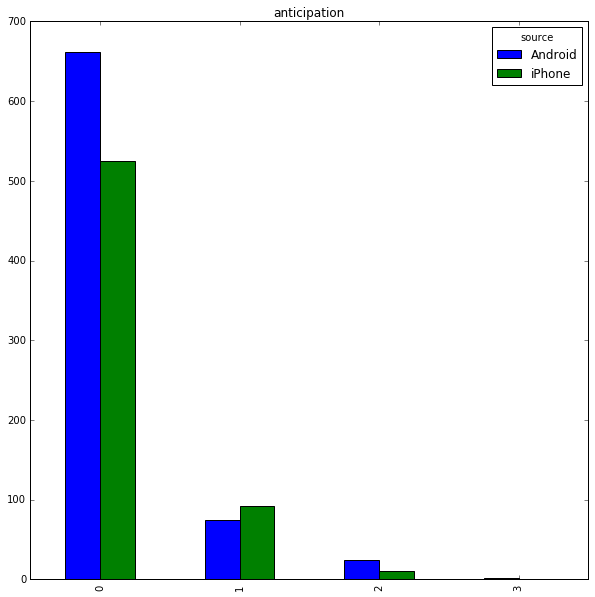

In [746]:
print(emoset)
score=tweet_score(anticipation)
source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values,kind='bar')
plt.title('anticipation')

['trust', 'anger', 'anticipation', 'joy', 'fear', 'positive', 'negative', 'disgust', 'surprise', 'sadness']


/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


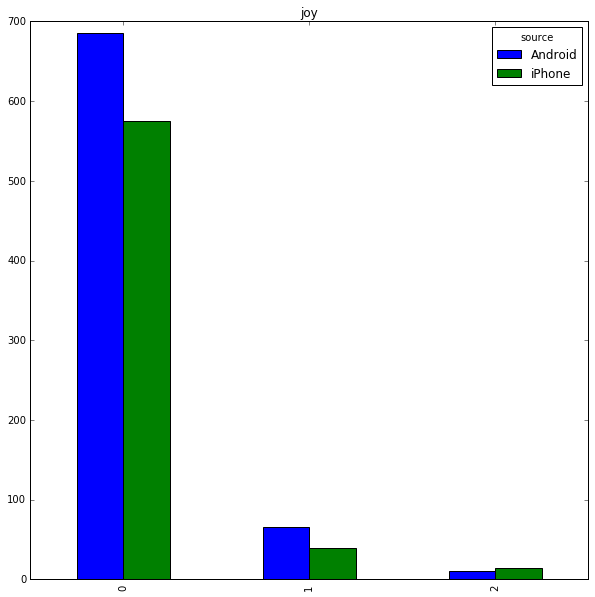

In [747]:
print(emoset)
score=tweet_score(joy)
source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values,kind='bar')
plt.title('joy')

['trust', 'anger', 'anticipation', 'joy', 'fear', 'positive', 'negative', 'disgust', 'surprise', 'sadness']


/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


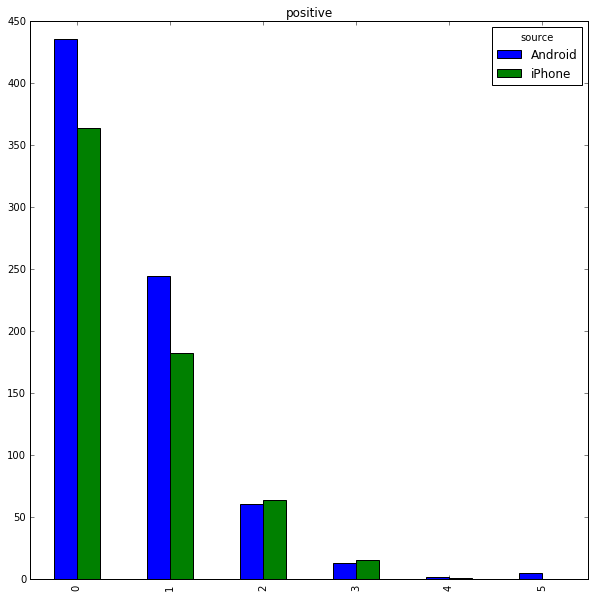

In [748]:
print(emoset)
score=tweet_score(positive)
source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values,kind='bar')
plt.title('positive')

['trust', 'anger', 'anticipation', 'joy', 'fear', 'positive', 'negative', 'disgust', 'surprise', 'sadness']


/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


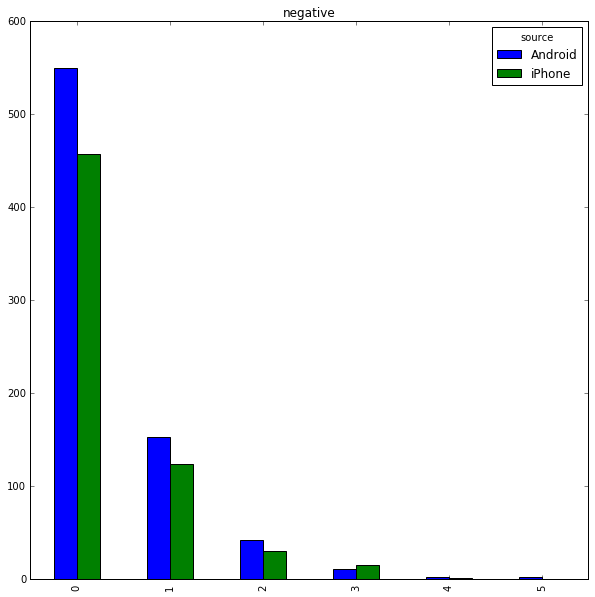

In [749]:
print(emoset)
score=tweet_score(negative)
source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values,kind='bar')
plt.title('negative')

['trust', 'anger', 'anticipation', 'joy', 'fear', 'positive', 'negative', 'disgust', 'surprise', 'sadness']


/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


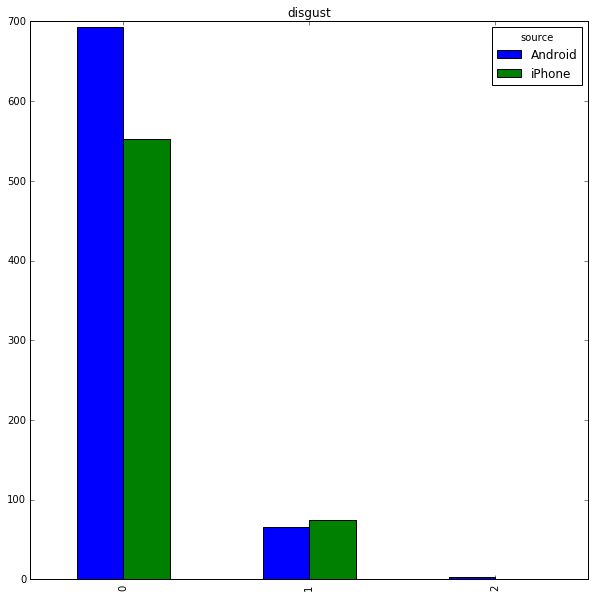

In [750]:
print(emoset)
score=tweet_score(disgust)
source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values,kind='bar')
plt.title('disgust')

['trust', 'anger', 'anticipation', 'joy', 'fear', 'positive', 'negative', 'disgust', 'surprise', 'sadness']


/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


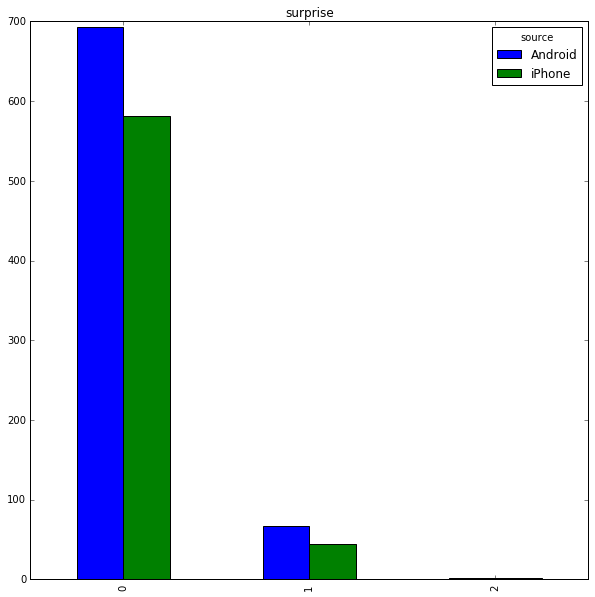

In [751]:
print(emoset)
score=tweet_score(surprise)
source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values,kind='bar')
plt.title('surprise')

['trust', 'anger', 'anticipation', 'joy', 'fear', 'positive', 'negative', 'disgust', 'surprise', 'sadness']


/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/wangfang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


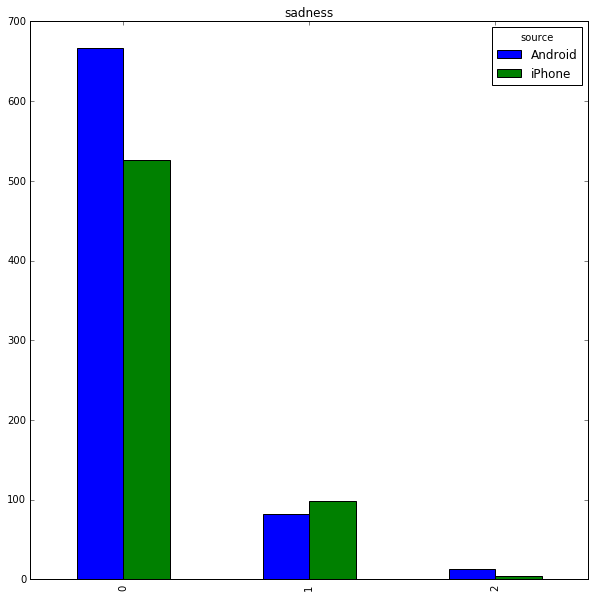

In [752]:
print(emoset)
score=tweet_score(sadness)
source_score=score.pivot('score', 'source','count')
source_score.shape
source_score.plot(source_score.index.values,kind='bar')
plt.title('sadness')